In [237]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [238]:
data = pd.read_csv('student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [239]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [264]:
data.dropna(inplace=True)

In [240]:
max_threshold=data['age'].quantile(0.25)
max_threshold

np.float64(16.0)

In [241]:
data[data['age'] <= max_threshold].shape

(186, 33)

In [242]:
up_data=data[data['age'] <= max_threshold]
up_data.shape

(186, 33)

In [243]:
up_data['sex'].value_counts()

sex
M    94
F    92
Name: count, dtype: int64

In [244]:
up_data['failures'].value_counts()  

failures
0    159
1     13
2      9
3      5
Name: count, dtype: int64

In [245]:
up_data['absences'].describe()

count    186.000000
mean       4.521505
std        6.172482
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       54.000000
Name: absences, dtype: float64

In [246]:
up_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,GP,M,16,U,GT3,T,4,4,services,services,...,5,3,2,1,2,5,0,13,12,12
245,GP,M,16,U,GT3,T,2,1,other,other,...,4,3,3,1,1,4,6,18,18,18
249,GP,M,16,U,GT3,T,0,2,other,other,...,4,3,2,2,4,5,0,13,15,15
251,GP,M,16,U,GT3,T,3,3,at_home,other,...,5,3,3,1,3,2,6,7,10,10


In [247]:
up_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [248]:
drop_columns=['school','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','traveltime']

In [249]:
up_data.drop(columns=drop_columns,inplace=True)
up_data.shape

(186, 8)

In [250]:
up_data.columns

Index(['sex', 'age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3'], dtype='object')

In [251]:
for col in up_data.columns[1:]:
    up_data[col] = up_data[col].astype('int')
up_data.dtypes
    

sex          object
age           int64
studytime     int64
failures      int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [252]:
up_data.describe()

,age,studytime,failures,absences,G1,G2,G3
count,186.00000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,15.55914,2.000000,0.247312,4.521505,11.069892,11.263441,11.129032
std,0.49783,0.876109,0.668292,6.172482,3.276527,3.882108,4.413066
min,15.00000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,15.00000,1.000000,0.000000,0.000000,8.000000,9.000000,9.000000
50%,16.00000,2.000000,0.000000,2.000000,11.000000,11.000000,11.000000
75%,16.00000,2.000000,0.000000,6.000000,13.750000,14.000000,14.000000
max,16.00000,4.000000,3.000000,54.000000,19.000000,19.000000,20.000000


In [253]:
up_data['age'].value_counts()

age
16    104
15     82
Name: count, dtype: int64

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

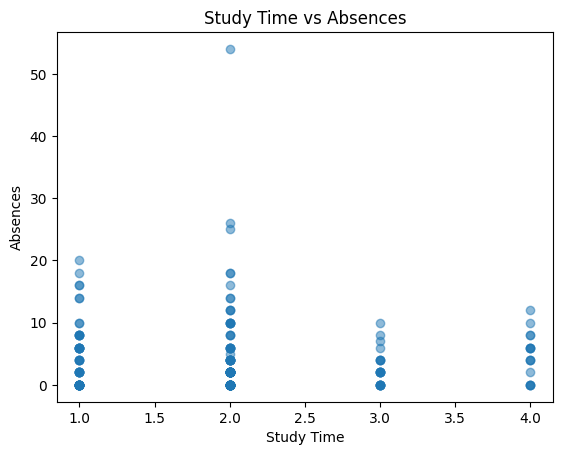

In [255]:
plt.scatter(up_data['studytime'], up_data['absences'], alpha=0.5)
plt.title('Study Time vs Absences')
plt.xlabel('Study Time')
plt.ylabel('Absences')
plt.show()


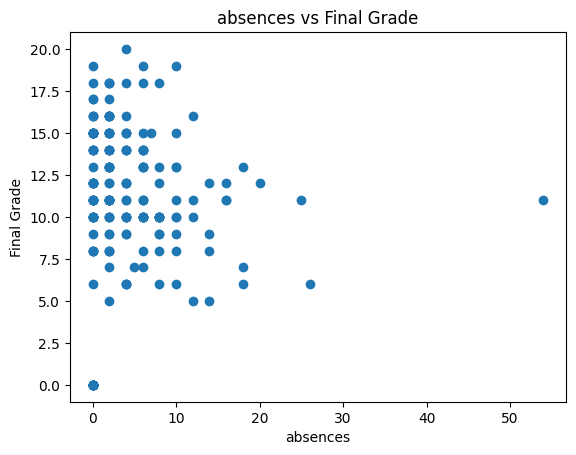

In [256]:
plt.scatter(up_data['absences'], up_data['G3'])
plt.title('absences vs Final Grade')
plt.xlabel('absences')
plt.ylabel('Final Grade')
plt.show()

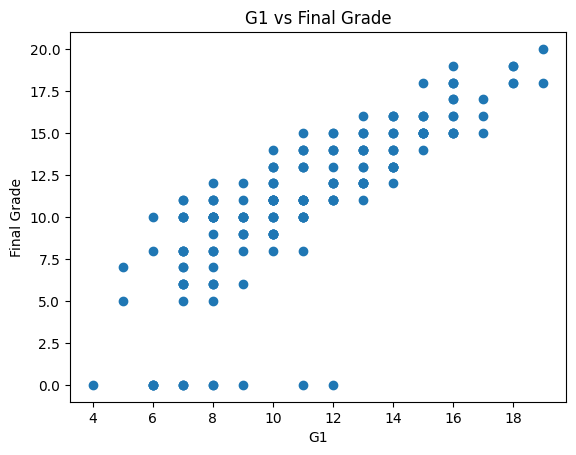

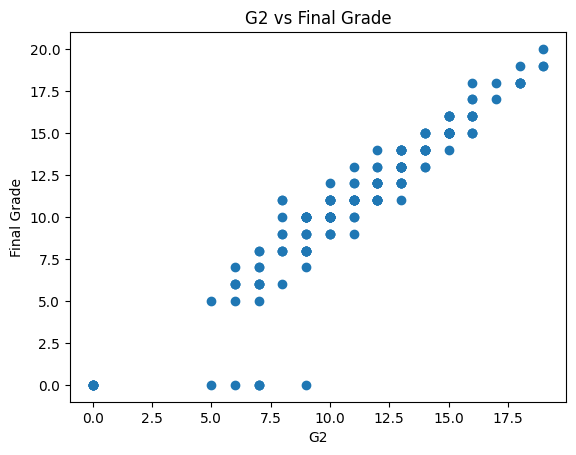

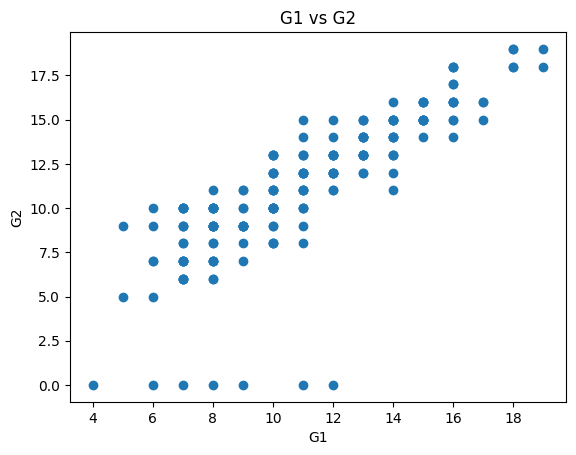

In [257]:
plt.scatter(up_data['G1'], up_data['G3'])
plt.title('G1 vs Final Grade')
plt.xlabel('G1')
plt.ylabel('Final Grade')
plt.show()
plt.scatter(up_data['G2'], up_data['G3'])
plt.title('G2 vs Final Grade')
plt.xlabel('G2')
plt.ylabel('Final Grade')
plt.show()
plt.scatter(up_data['G1'], up_data['G2'])
plt.title('G1 vs G2')
plt.xlabel('G1')
plt.ylabel('G2')
plt.show()

In [258]:
up_data1=up_data.drop('sex', axis=1)
up_data1.columns

Index(['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3'], dtype='object')

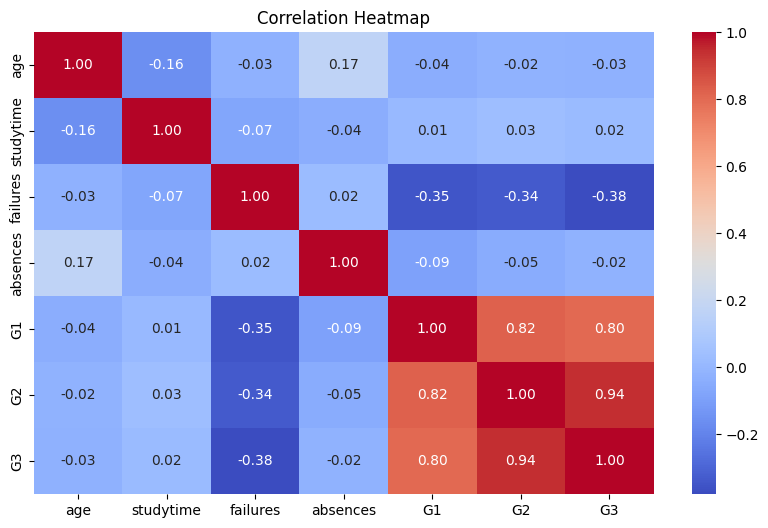

In [259]:
plt.figure(figsize=(10, 6))
sns.heatmap(up_data1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [260]:
up_data

,sex,age,studytime,failures,absences,G1,G2,G3
2,F,15,2,3,10,7,8,10
3,F,15,3,0,2,15,14,15
4,F,16,2,0,4,6,10,10
5,M,16,2,0,10,15,15,15
6,M,16,2,0,0,12,12,11
...,...,...,...,...,...,...,...,...
243,M,16,1,0,0,13,12,12
245,M,16,1,0,6,18,18,18
249,M,16,1,0,0,13,15,15
251,M,16,2,0,6,7,10,10


In [261]:
dummies=pd.get_dummies(up_data['sex'],dtype='int')
dummies

,F,M
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
...,...,...
243,0,1
245,0,1
249,0,1
251,0,1


In [262]:
df=pd.concat([dummies,up_data],axis=1)
df.drop(columns=['sex','F'],axis=1,inplace=True)
df.columns

Index(['M', 'age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3'], dtype='object')

In [263]:
df

,M,age,studytime,failures,absences,G1,G2,G3
2,0,15,2,3,10,7,8,10
3,0,15,3,0,2,15,14,15
4,0,16,2,0,4,6,10,10
5,1,16,2,0,10,15,15,15
6,1,16,2,0,0,12,12,11
...,...,...,...,...,...,...,...,...
243,1,16,1,0,0,13,12,12
245,1,16,1,0,6,18,18,18
249,1,16,1,0,0,13,15,15
251,1,16,2,0,6,7,10,10


In [265]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [266]:
X=df.drop(columns=['G3'])
y=df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8980736050214959

In [267]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Predicted Final Grades')

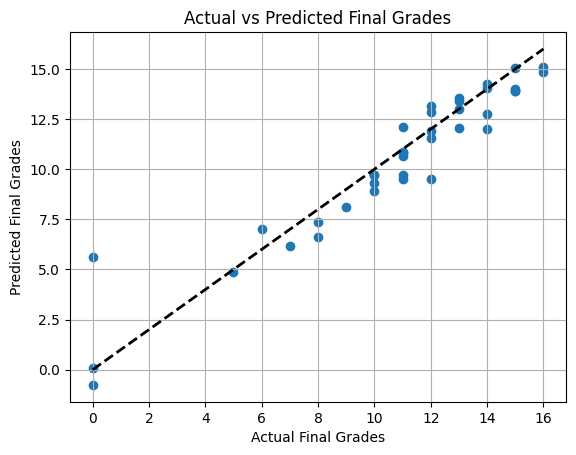

In [269]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid()
plt.title('Actual vs Predicted Final Grades')
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')

In [279]:
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,classification_report
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.7028907748313102
R-squared: 0.8980736050214959


In [280]:
classification_report = classification_report(y_test, y_pred.round())
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       1.00      0.33      0.50         3
         5.0       1.00      1.00      1.00         1
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         1
        10.0       0.50      0.50      0.50         4
        11.0       1.00      0.50      0.67         6
        12.0       0.40      0.40      0.40         5
        13.0       0.40      0.50      0.44         4
        14.0       0.33      0.50      0.40         4
        15.0       0.33      0.25      0.29         4
        16.0       0.00      0.00      0.00         2

    accuracy                           0.37        38
   macro avg       0.35      0.28      0.30        38
weighted avg       0.48      0.37      0.40        38



In [274]:
cm=confusion_matrix(y_test, y_pred.round())
cm

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]])

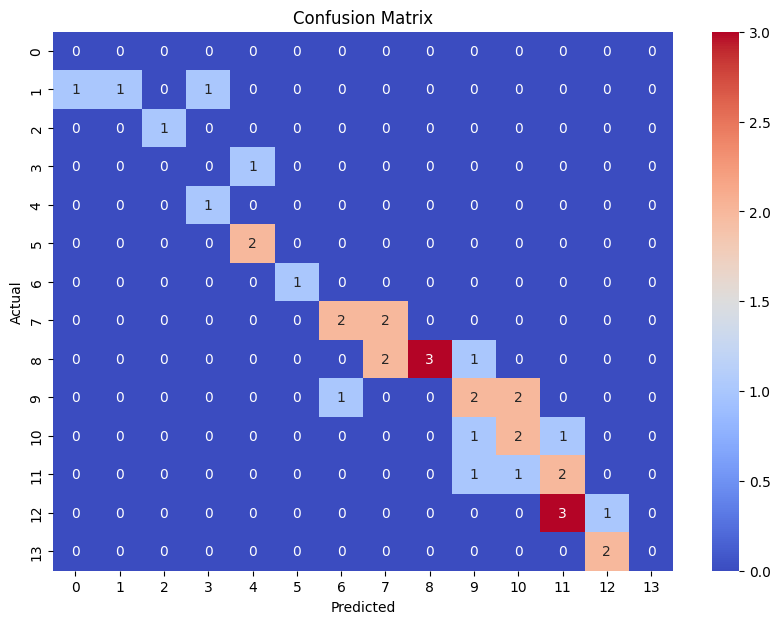

In [285]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
